In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm 
from matplotlib.patches import Polygon

# Lectures des fichiers 

In [252]:
dferp = pd.read_excel('erp.xlsx')
dfliaison = pd.read_excel('liaison.xlsx')
dfweb = pd.read_excel('web.xlsx')

c:\Users\ikram\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
c:\Users\ikram\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
c:\Users\ikram\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [253]:
dferp

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock
...,...,...,...,...,...
820,7203,0,45.0,30,instock
821,7204,0,45.0,9,instock
822,7247,1,54.8,23,instock
823,7329,0,26.5,14,instock


# Vérification de la présences des données dans les colonnes

In [254]:
pd.pandas.set_option('display.max_columns', None)
print("rating",dfweb.rating_count.unique(),"downloadable",dfweb.downloadable.unique(),"average",dfweb.average_rating.unique(),"virtual",dfweb.virtual.unique()
,"post_password",dfweb.post_password.unique(),"post_content_filtered",dfweb.post_content_filtered.unique(),"post_parent",dfweb.post_parent.unique(),"menu_order",dfweb.menu_order.unique(),
"post_mime_type",dfweb.post_mime_type.unique(),"comment_count",dfweb.comment_count.unique())


rating [0] downloadable [0] average [ 0. nan] virtual [0] post_password [nan] post_content_filtered [nan] post_parent [ 0. nan] menu_order [ 0. nan] post_mime_type [nan 'image/jpeg'] comment_count [ 0. nan]


# Suppression des colonnes vides 

In [255]:
dfweb.drop(columns=["tax_status","tax_class","post_excerpt","post_content","guid","downloadable","rating_count","downloadable","average_rating","virtual","post_password","post_content_filtered","post_parent","menu_order","post_mime_type","comment_count","post_date_gmt","post_modified_gmt"], axis=0, inplace=True)

In [256]:
pd.pandas.set_option('display.max_columns', None)
dfweb.head()

,sku,total_sales,post_author,post_date,post_title,post_status,comment_status,ping_status,post_name,post_modified,post_type
0,bon-cadeau-25-euros,10.0,1.0,2018-06-01 13:53:46,Bon cadeau de 25€,publish,closed,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,product
1,15298,6.0,2.0,2018-02-08 12:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,publish,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,product
2,15296,0.0,2.0,2018-02-08 13:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,publish,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,product
3,15300,0.0,2.0,2018-02-08 14:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,publish,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,product
4,19814,3.0,2.0,2018-02-09 14:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,publish,closed,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,product


re-nom de la colonne id_web 

In [257]:
dfliaison = dfliaison.rename(columns = {'id_web = SKU': 'sku'})

jointure complete

In [258]:
df_inner = pd.merge(dfliaison, dferp, how='outer', indicator= True)

Vérifie que les valeurs sont présentent dans les deux dataframe 

In [259]:
df_inner.head()

,product_id,sku,onsale_web,price,stock_quantity,stock_status,_merge
0,3847,15298,1,24.2,0,outofstock,both
1,3849,15296,1,34.3,0,outofstock,both
2,3850,15300,1,20.8,0,outofstock,both
3,4032,19814,1,14.1,0,outofstock,both
4,4039,19815,1,46.0,0,outofstock,both


Je vérifie que j'ai bien "both" partout

In [260]:
df_inner[df_inner["_merge"] != "both"]

,product_id,sku,onsale_web,price,stock_quantity,stock_status,_merge


Seconde liaison 

In [261]:
df_inner2= pd.merge(df_inner,dfweb, on='sku',how='inner')

organise mon df par ordre croissant

In [262]:
df_inner2 = df_inner2.sort_values(by = 'price', ascending = True)

je calcul le chiffre d'affaire pour chaque produit

In [263]:
chiffreaffaire = df_inner2["price"]*df_inner2["total_sales"]

J'inser ma variable dans mon dataframe

In [264]:
df_inner2.insert(column = 'chiffre_d_affaire', value = chiffreaffaire, loc=3)

In [265]:
df_inner2.head()

,product_id,sku,onsale_web,chiffre_d_affaire,price,stock_quantity,stock_status,_merge,total_sales,post_author,post_date,post_title,post_status,comment_status,ping_status,post_name,post_modified,post_type
9026,6129,14570,1,0.0,5.2,30,instock,both,0.0,2.0,2019-06-28 18:01:06,Moulin de Gassac IGP Pays d'Hérault Guilhem Bl...,publish,closed,closed,moulin-de-gassac-igp-pays-dherault-guilhem-bla...,2020-08-26 15:55:02,attachment
9025,6129,14570,1,0.0,5.2,30,instock,both,0.0,2.0,2019-06-28 18:01:06,Moulin de Gassac IGP Pays d'Hérault Guilhem Bl...,publish,closed,closed,moulin-de-gassac-igp-pays-dherault-guilhem-bla...,2020-08-26 15:55:02,product
7930,4172,16210,1,245.1,5.7,167,instock,both,43.0,2.0,2018-02-14 16:54:33,Maurel Pays d'Oc Chardonnay 2019,publish,closed,closed,maurel-pays-oc-chardonnay-2019,2020-08-27 15:35:02,attachment
7931,4173,16211,1,74.1,5.7,100,instock,both,13.0,2.0,2018-02-14 17:10:39,Maurel Pays d'Oc Chenin-Colombard 2019,publish,closed,closed,maurel-pays-doc-chenin-colombard-2019,2020-08-07 17:35:03,product
8855,5777,14338,1,0.0,5.7,132,instock,both,0.0,2.0,2019-03-15 10:13:30,Maurel Pays d'Oc Cabernet-Sauvignon 2017,publish,closed,closed,maurel-pays-d-oc-cabernet-sauvignon-2017,2020-03-11 09:30:06,product


Je récupère seulement les produits vendus en ligne avec le type = product

In [266]:
dfventeweb = df_inner2[df_inner2["onsale_web"] != 0]
dfventeweb = df_inner2[df_inner2["post_type"] == "product"]

In [267]:
print("le chiffre d'affaire des vente en ligne et de : ",round(dfventeweb.chiffre_d_affaire.sum(),2),"€")

le chiffre d'affaire des vente en ligne et de :  70568.6 €


Graphique en point du prix des produits

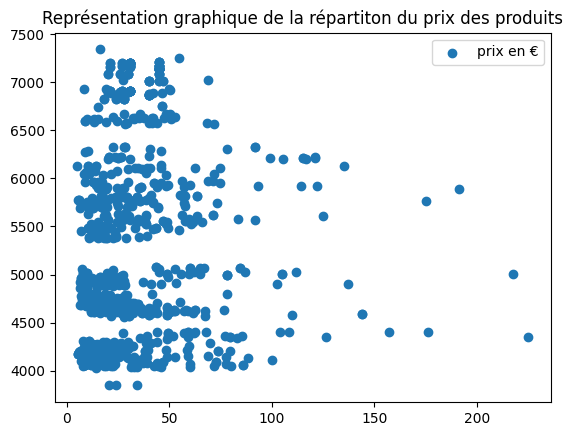

In [268]:
plt.scatter(dfventeweb["price"],dfventeweb["product_id"],label="prix en €")
plt.title("Représentation graphique de la répartiton du prix des produits")
plt.legend()
plt.show()

## Calcul de l'écart-type

In [269]:
std = dfventeweb["price"].std()
print("ecart_type = ", std)

ecart_type =  26.401321320070902


## Calcul de la moyenne 

In [270]:
mean = dfventeweb["price"].mean()
print("moyenne = ", mean)

moyenne =  32.80301339285714


## Calcul du z_score pour chaque produit

In [272]:
def outlier(data):
    df_zscore = round((data["price"]-mean)/std,2)
    data.insert(column="Z-score", value= df_zscore, loc= 4 )
    dfzs = data[data["Z-score"]>= 3] 
    
    return dfzs


In [273]:
dfzscore = outlier(dfventeweb)

## Graphique en point de la répartition du z_score

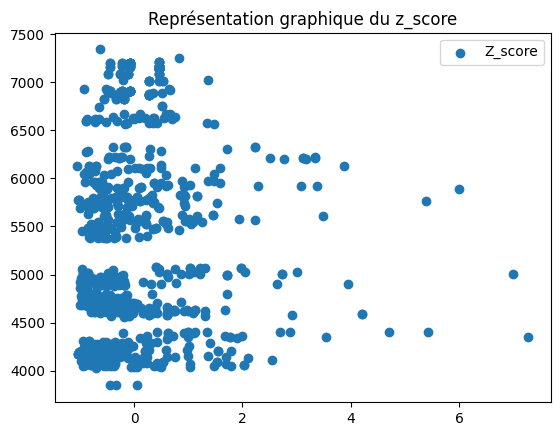

In [274]:
plt.scatter(dfventeweb["Z-score"],dfventeweb["product_id"],label="Z_score")
plt.title("Représentation graphique du z_score")
plt.legend()
plt.show()

## Représentation graphique de la population et des outlier

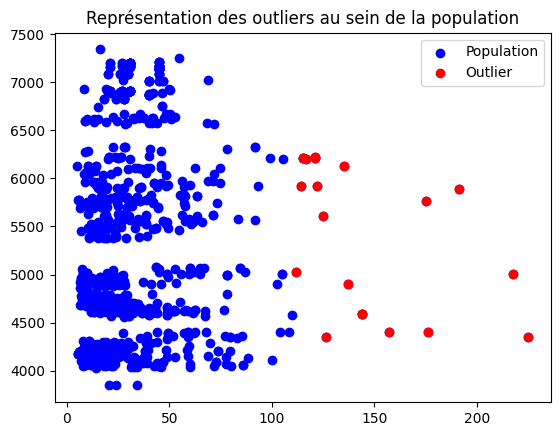

In [275]:
x1 = dfventeweb["product_id"]
y1 = dfventeweb["price"]
x = dfzscore["product_id"]
y= dfzscore["price"]
fig1 = plt.scatter(y1,x1,c="blue",label="Population")
plt.title("Représentation des outliers au sein de la population")
fig2 = plt.scatter(y,x,c="red",label="Outlier")
plt.legend()
plt.show()


## Calcul de l'écart interquartile 

In [284]:
def ei(new_dfventweb):
    new_dfventweb = dfventeweb.sort_values(by = "price", ascending= True)
    new_dfventweb = new_dfventweb[new_dfventweb["onsale_web"] == 1]
    Q3,Q1 = np.percentile(new_dfventweb["price"], [75 ,25])
    EI = round(Q3-Q1)
    outlierinf = Q1-(1.5*EI)
    outliersup = Q3+(1.5*EI)
    print("Q3=", Q3, "Q1=", Q1, "EI=", EI, ", 50% des produits sont compris entre",Q1,"et",Q3,", les outlier on une limit Lower=",outlierinf,"et une limite Upper=",outliersup)
    return new_dfventweb

In [277]:
new_ventweb = ei(dfventeweb)

Q3= 43.075 Q1= 14.1 EI= 29 , 50% des produits sont compris entre 14.1 et 43.075 , les ouitlier on une limit Lower= -29.4 et une limite Upper= 86.575


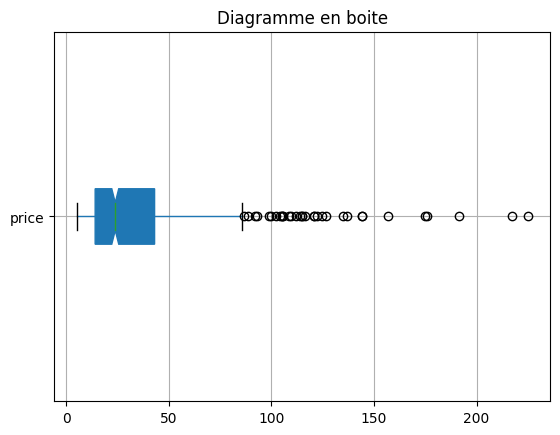

In [278]:
fig = new_ventweb.boxplot(column="price",notch=True, patch_artist=True,vert = 0)
plt.title("Diagramme en boite")
plt.show()

## Anomalie ? 

j'isole les produit mis en ligne et avec des ventes 

In [279]:
df_zscoreonligne = dfzscore[dfzscore["onsale_web"] != 0] 


In [280]:
sales = df_zscoreonligne[df_zscoreonligne["total_sales"] != 0]

In [281]:
print("le chiffre d'affaire pour les outlier est de",df_zscoreonligne["chiffre_d_affaire"].sum() )
print("les outlier représente",round((df_zscoreonligne["chiffre_d_affaire"].sum()/ dfventeweb["chiffre_d_affaire"].sum())*100,2),"%", "du chiffre d'affaire")

le chiffre d'affaire pour les outlier est de 6563.4
les outlier représente 9.3 % du chiffre d'affaire


Produit ayant 0 vente 

In [282]:
nosales = df_zscoreonligne[df_zscoreonligne["total_sales"] == 0]

Représentation des outliers avec et sans ventes

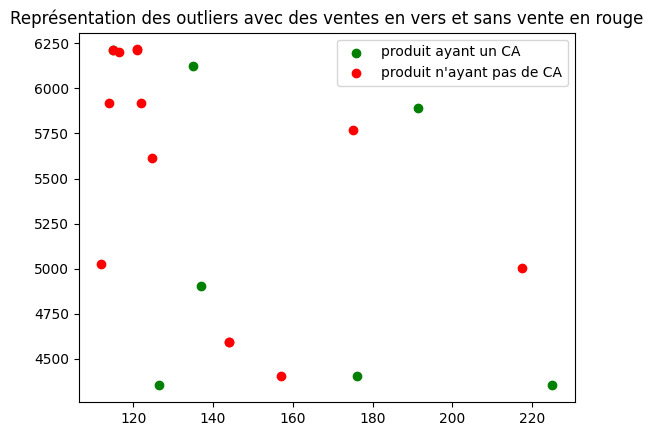

In [283]:
x1 = sales["product_id"]
y1 = sales["price"]
x = nosales["product_id"]
y= nosales["price"]
fig1 = plt.scatter(y1,x1,c="green",label="produit ayant un CA")
plt.title("Représentation des outliers avec des ventes en vers et sans vente en rouge")
fig2 = plt.scatter(y,x,c="red",label="produit n'ayant pas de CA")
plt.legend()
plt.show()